# Mid-Course Project



### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit. 

Before the management team of the company can take any actionable decision with regards to the campagn,they want to draw the necessary insight from their 'sitting data'.

As their Data Analyst,you are presented with their four year daily sales records (**superstore data.csv**).

#### Task
Analyse the given  data and advise management on what to do to increase sales and profit as intended in the compaign.

Kindly  outlay your analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.


Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a report on your findings and your advice.

**Use Powerpoint or any other presentation application for your presentation.**

Good Luck !








# DATA ANALYSIS 

### **CRISP-DM Steps**

#### Business Issue Understanding:

* *Project Objective*: **'Operation Increase Sales and Profit' (OISP)** - increase the sales of the company and maximise profit.
*   *Problem Definition*: Analyse the given data and advise management on what to do to increase sales and profit as intended in the compaign.


#### Data Understanding:

*   What data is needed?
    - Sales data
    - Customer data
    - Company Expenditure

*   What data is available?
    - Sales data
    - Customer data
    - Product Data

*   What are the important characteristics of the data?
      - Data quality problems (missing values, duplicates, etc) = Null values(postal code,), No duplicate rows,
      - First insights into the data
            1. Many postal addresses fields = NULL
            2. Postal Code is having over 40,000 missing values hence may be dropped.









In [1]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style as style
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


In [2]:
#Reading the data
#NB: Make sure you the data in your current working directory

data = pd.read_csv('superstore data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

In [3]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


### Exploratory Data Analysis (EDA)

In [4]:
for col in data.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Postal Code
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [6]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

##### The Postal ID Column has 41,296 null values out of 51,290 values. Hence may be dropped.

### Are there any duplicates?

In [7]:
duplicate = data[data.duplicated()]
duplicate

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


From the output above, there are no duplicates in this data.

In [8]:
data['Row ID'].nunique()

51290

In [9]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

### Creating Columns for Unit Price, Year, Month, Day and Order Delay between Order Date and Ship Date

In [10]:
data['Unit Price'] = data['Sales'] / data['Quantity']
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month_name()
data['Day'] = data['Order Date'].dt.day_name()
data['Order Delay'] = data['Ship Date'] - data['Order Date']

In [11]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Unit Price', 'Year',
       'Month', 'Day', 'Order Delay'],
      dtype='object')

### Splitting the data into categorical and numerical variables
This is done to make it easier to understand and clean the data.

In [12]:
numerical = data.select_dtypes(include= np.number)
categorical = data.select_dtypes(include = 'object')

## Descriptive Statistics on Numerical Data

In [13]:
numerical.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Unit Price,Year,Order Delay
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915,71.657487,2012.777208,5 days 01:53:49.120686293
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804,113.581515,1.098931,97 days 18:30:57.003928096
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.336000,2011.000000,-322 days +00:00:00
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000,11.799900,2012.000000,1 days 00:00:00
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000,29.400000,2013.000000,4 days 00:00:00
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000,82.160000,2014.000000,59 days 00:00:00
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000,3773.080000,2014.000000,214 days 00:00:00


In [14]:
numerical.drop('Postal Code', axis=1, inplace=True)  

#### Highest sales

In [15]:
data[data['Sales'].isin([22638.480000])]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Year,Month,Day,Order Delay
28612,33994,CA-2011-145317,2011-03-18,2011-03-23,Standard Class,SM-20320,Sean Miller,Home Office,Jacksonville,Florida,United States,32216.0,US,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferencing Unit,22638.48,6,0.5,-1811.0784,24.29,Medium,3773.08,2011,March,Friday,5 days


#### Lowest sales

In [16]:
data[data['Sales'].isin([0.444000])]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Year,Month,Day,Order Delay
32580,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,77095.0,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum,0.444,1,0.8,-1.11,0.01,Medium,0.444,2014,June,Friday,4 days


#### Over all, highest sales was 22638.28 by a customer from United States in the South region of the US Market in 2011

#### Overall, lowest sales was 0.444 by a customer from the United States in the Central region of the US Market in 2011


#### Highest profit

In [17]:
data[data['Profit'].isin([8399.976000])]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Year,Month,Day,Order Delay
8898,38123,CA-2013-118689,2013-03-10,2013-10-10,Standard Class,TC-20980,Tamara Chand,Corporate,Lafayette,Indiana,United States,47905.0,US,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.976,349.07,Medium,3499.99,2013,March,Sunday,214 days


#### Lowest Profit

In [18]:
data[data['Profit'].isin([-6599.978000])]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Year,Month,Day,Order Delay
43453,39069,CA-2013-108196,2013-11-26,2013-03-12,Standard Class,CS-12505,Cindy Stewart,Consumer,Lancaster,Ohio,United States,43130.0,US,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978,451.63,Low,899.997,2013,November,Tuesday,-259 days


### Overall, highest profit was 8399.976 by a customer from the United States in the Central region in the US Market in 2013

### Overall, lowest profit was -6599.978 by a customer from the United States in the East region in the US Market in 2013

In [19]:
data[data['Shipping Cost'].isin([933.570000])]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Year,Month,Day,Order Delay
50688,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wireless Headset System,2309.65,7,0.0,762.1845,933.57,Critical,329.95,2012,July,Tuesday,0 days


### Finding the Correlation Between Numerical Variables

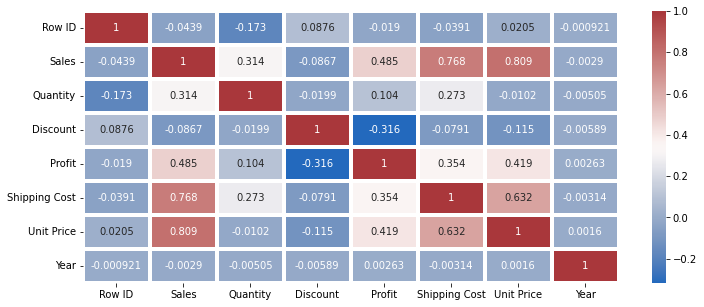

In [20]:
corrMatrix=numerical.corr()
plt.figure(figsize=(12,5))
sns.heatmap(data=corrMatrix,annot=True,fmt='.3g',linewidths=3, cmap = 'vlag') 

1. The correlation between discount and sales is -0.0867. This shows an inverse relationship between these two variables. As discount increases, sales turn to drop since part of the sales values would have to be reduced.

2. The correlation between shipping cost and sales is 0.768. This shows a positive direct relationship. As sales increase, shipping cost also turn to increase because customers would have bought more and hence need to pay more.  

3. The correlation between quantity and profit is 0.104. This shows a positive relationship between quantity and prfit. As more quantities are sold out, they will be more profit for the company.

4. The correlation between shipping cost and profit is 0.354. This also shows a positive relationship between the two variables. More shipping cost implies more sales, which will also result into more profit. 

### Descriptive Statistics on Market Sales and Profit

In [21]:
data[['Market', 'Sales', 'Profit']].groupby('Market').describe()

Sales                                                     \
          count        mean         std    min        25%      50%   
Market                                                               
APAC    11002.0  325.917481  551.633646  2.880  47.083875  122.697   
Africa   4587.0  170.868370  359.395167  1.161  20.425500   52.440   
Canada    384.0  174.292109  332.848799  3.990  26.302500   60.030   
EMEA     5029.0  160.302508  327.192343  1.440  19.608000   51.780   
EU      10000.0  293.808906  486.055635  2.955  49.462500  119.355   
LATAM   10294.0  210.278334  349.073157  1.566  32.880000   80.356   
US       9994.0  229.858001  623.245101  0.444  17.280000   54.490   

                               Profit                                   \
               75%       max    count       mean         std       min   
Market                                                                   
APAC    347.869425   6998.64  11002.0  39.629163  170.519576 -3009.435   
Africa  162.540000   5301.24   4587.0  19.374674  146.530457 -1576.824   
Canada  170.820000   3863.88    384.0  46.399453  115.439881     0.000   
EMEA    151.932000   5211.12   5029.0   8.728966  154.196926 -4088.376   
EU      320.708625   7958.58  10000.0  37.282974  178.100384 -3059.820   
LATAM   227.790000   3474.08  10294.0  21.531328  118.795371 -1806.240   
US      209.940000  22638.48   9994.0  28.656896  234.260108 -6599.978   

                                             
            25%       50%     75%       max  
Market                                       
APAC   -2.99850  10.88625  48.360  2939.310  
Africa  0.39000   7.56000  28.305  2597.280  
Canada  4.53000  12.34500  33.045  1159.020  
EMEA   -7.58400   5.04000  24.840  1622.880  
EU      1.32000  14.22000  48.510  3979.080  
LATAM  -0.76800   8.00000  32.640  1313.280  
US      1.72875   8.66650  29.364  8399.976

#### There are 7 markets - APAC, Africa, Canada, EMEA, EU, LATAM and US

1. APAC made the **overall highest number of sales** (11,002) and **average sales** (325.92)
2. Canada made the **overall best average profit** of 39.63 but **lowest sales count** of 384
3. EMEA made the **lowest average sales** of 160 as well as **lowest profit** of 8.73

#### Sales and Profit per Market

In [22]:
markets = data['Market'].unique()

print('Market','\t\t','Total Sales', '\t\t','Total Profit \n')

for market in markets:
  total_sales = data[data['Market'] == market]['Sales'].sum().round(2)
  total_profit = data[data['Market'] == market]['Profit'].sum().round(2)
  print(market,'\t\t', total_sales, '\t\t', total_profit)

Market 		 Total Sales 		 Total Profit 

Africa 		 783773.21 		 88871.63
APAC 		 3585744.13 		 436000.05
EMEA 		 806161.31 		 43897.97
EU 		 2938089.06 		 372829.74
US 		 2297200.86 		 286397.02
LATAM 		 2164605.17 		 221643.49
Canada 		 66928.17 		 17817.39


Sales By Market

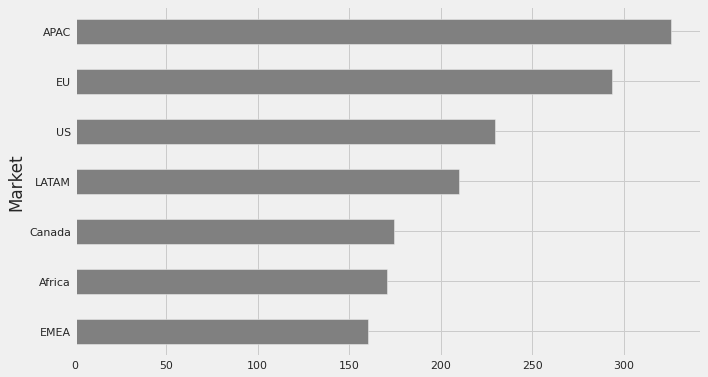

In [81]:
#bar chart of the different market sales
data.groupby('Market')['Sales'].mean().sort_values().\
plot.barh(color='gray')

On average, APAC market brings in more sales to Superstore than all other markets.

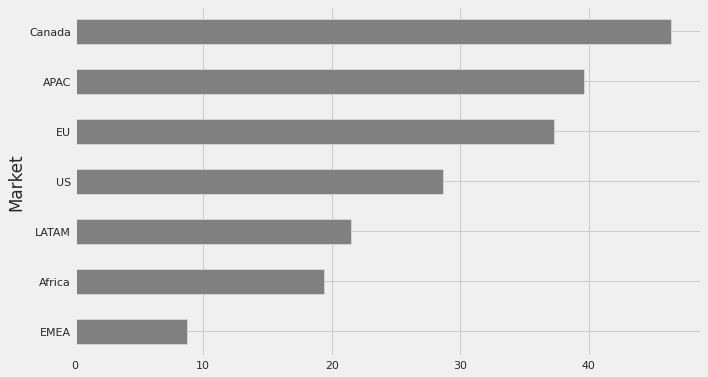

In [80]:
#bar chart of the different market sales
data.groupby('Market')['Profit'].mean().sort_values().\
plot.barh(color='gray')

However, in terms of profit, the Canada market brings in more profit compared to the other markets. 



### Descriptive Statistics of Country Sales Data

In [24]:
data[['Country', 'Sales', 'Profit']].groupby('Country').describe()

Sales                                                     \
             count        mean         std     min      25%       50%   
Country                                                                 
Afghanistan   55.0  394.060364  714.459065  13.260  79.0650  155.8800   
Albania       16.0  243.007500  401.901971   6.450  25.8600   95.4900   
Algeria      196.0  184.140765  300.701543   4.800  26.5950   59.8800   
Angola       122.0  209.459016  371.583794   4.800  30.5475   56.2500   
Argentina    390.0  147.466111  240.245062   1.566  21.8790   63.6240   
...            ...         ...         ...     ...      ...       ...   
Venezuela    194.0  137.050668  187.523508   1.956  30.3120   60.0660   
Vietnam      265.0  248.302639  369.558869   7.968  50.7960  121.3128   
Yemen         30.0   82.190400  140.229052   3.438  14.6160   27.7380   
Zambia       102.0  255.250000  403.181687   5.910  42.5250  125.4300   
Zimbabwe      80.0   47.063813   90.088755   1.161   7.0875   16.4745   

                                 Profit                                     \
                   75%       max  count        mean         std        min   
Country                                                                      
Afghanistan  379.63500  4626.150   55.0   99.278182  182.794551     0.7200   
Albania      255.00750  1619.100   16.0   44.332500   75.716710     0.0000   
Algeria      197.25750  1908.720  196.0   46.461735   91.054675     0.0000   
Angola       207.09750  2478.600  122.0   53.237459   99.269180     0.0000   
Argentina    173.45700  2300.616  390.0  -47.932812  117.518207  -890.1780   
...                ...       ...    ...         ...         ...        ...   
Venezuela    160.79400  1054.020  194.0  -57.849023  141.444524  -890.1780   
Vietnam      286.02630  2672.517  265.0   -7.057474  130.927121  -692.9388   
Yemen         72.62325   645.948   30.0 -123.548600  182.539824  -727.7520   
Zambia       285.45000  2180.340  102.0   68.644412  143.950669     0.0000   
Zimbabwe      56.36700   627.228   80.0  -67.859812  135.871779 -1087.2120   

                                                   
                  25%      50%      75%       max  
Country                                            
Afghanistan    8.1600  24.3600  73.6650  848.7000  
Albania        1.9350  15.3450  40.8675  258.9000  
Algeria        5.9850  11.4300  39.7650  560.5200  
Angola         5.9175  15.9000  49.5450  592.2000  
Argentina    -41.3230 -11.9040  -2.0750   68.2360  
...               ...      ...      ...       ...  
Venezuela    -37.5150  -9.9300  -0.8040   32.6600  
Vietnam      -10.3851   3.3924  20.1894  836.1225  
Yemen       -119.9010 -52.6275 -21.5535   -5.0520  
Zambia         4.6275  25.3050  62.8725  959.2200  
Zimbabwe     -74.6130 -27.8670  -9.3975   -0.9210  

[147 rows x 16 columns]

In [25]:
data[['Market', 'Country','Sales', 'Profit', 'Shipping Cost', 'Unit Price']].groupby(['Market', 'Country']).mean()

Sales      Profit  Shipping Cost  Unit Price
Market Country                                                               
APAC   Afghanistan          394.060364   99.278182      41.822364   96.915818
       Australia            326.131778   36.625814      35.375051   84.487646
       Bangladesh           480.101043  119.207914      46.402883  112.216380
       Cambodia             388.356000   99.478667      40.483111  113.792000
       China                372.639375   80.150577      41.998415   99.006120
...                                ...         ...            ...         ...
LATAM  Peru                 110.081381  -33.999236      12.210679   33.096666
       Trinidad and Tobago  229.372149   76.682816      21.812000   52.796835
       Uruguay              404.689333   70.389333      45.229583   90.128167
       Venezuela            137.050668  -57.849023      14.484845   39.116871
US     United States        229.858001   28.656896      23.831678   60.919569

[149 rows x 4 columns]

In [26]:
data[['Market', 'Country']].value_counts()

Market  Country      
US      United States    9994
APAC    Australia        2837
EU      France           2827
LATAM   Mexico           2644
EU      Germany          2065
                         ... 
Africa  Burundi             2
        Chad                2
        Swaziland           2
        Eritrea             2
APAC    Mongolia            1
Length: 149, dtype: int64

In [27]:
data[['Country', 'City']].describe()

,Country,City
count,51290,51290
unique,147,3636
top,United States,New York City
freq,9994,915


### Descriptive Statistics of Product Category Sales Data 

In [28]:
data[['Category', 'Sales', 'Profit']].groupby('Category').agg([np.mean, min, max])

Sales                       Profit                     
                       mean    min        max       mean        min       max
Category                                                                     
Furniture        416.248905  1.892   5759.964  28.878567 -2750.2800  2316.510
Office Supplies  121.097120  0.444   9892.740  16.578961 -3701.8928  4946.370
Technology       467.858939  0.990  22638.480  65.454958 -6599.9780  8399.976

In [29]:
data[['Category', 'Sub-Category', 'Sales', 'Profit']].groupby(['Category', 'Sub-Category']).agg([np.mean, min, max])

Sales                         Profit  \
                                    mean     min        max        mean   
Category        Sub-Category                                              
Furniture       Bookcases     608.283800  35.490   5667.870   67.160688   
                Chairs        437.298126  13.545   5759.964   40.884178   
                Furnishings   121.633519   1.892   1519.140   14.816223   
                Tables        879.258913  24.368   5451.300  -74.429023   
Office Supplies Appliances    576.105017   0.444   7958.580   80.729681   
                Art            76.201508   1.344   1113.024   11.868505   
                Binders        75.083145   0.556   9892.740   11.776633   
                Envelopes      70.186571   1.632    604.656   12.156516   
                Fasteners      34.397651   1.240    271.320    4.762572   
                Labels         28.167318   1.668    786.480    5.759982   
                Paper          69.047970   3.380    733.950   16.734789   
                Storage       222.788271   2.799   2962.680   21.439314   
                Supplies      100.236792   1.744   8187.650    9.312686   
Technology      Accessories   243.654315   0.990   3449.880   42.154896   
                Copiers       679.008670  35.460  17499.950  116.314687   
                Machines      524.266532  11.511  22638.480   39.614989   
                Phones        508.437337   2.970   6998.640   64.556749   

                                                    
                                    min        max  
Category        Sub-Category                        
Furniture       Bookcases    -1981.3950  2316.5100  
                Chairs       -2211.1650  1868.1300  
                Furnishings   -446.4000   561.9600  
                Tables       -2750.2800  2071.4400  
Office Supplies Appliances   -3059.8200  3979.0800  
                Art           -371.2320   269.2200  
                Binders      -3701.8928  4946.3700  
                Envelopes     -173.2920   279.3600  
                Fasteners     -121.2960   127.2600  
                Labels         -63.5400   385.3752  
                Paper         -191.4660   352.2960  
                Storage       -800.0640   802.1700  
                Supplies     -1049.3406   327.5060  
Technology      Accessories  -1345.5000  1216.0200  
                Copiers      -1672.5000  8399.9760  
                Machines     -6599.9780  2799.9840  
                Phones       -4088.3760  2939.3100

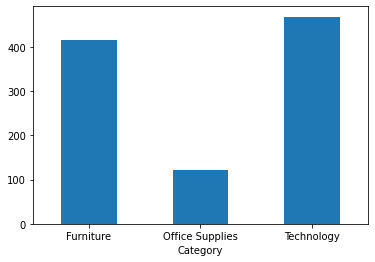

In [30]:
data.groupby('Category')['Sales'].mean().plot.bar(rot = 360)


In [31]:
data[['City', 'Category']].groupby('Category').describe()

City                           
                 count unique            top freq
Category                                         
Furniture         9876   2339  New York City  192
Office Supplies  31273   3343  New York City  552
Technology       10141   2397  New York City  171

In [32]:
data.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority,Month,Day
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4,12,7
top,CA-2014-100111,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium,November,Friday
freq,14,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433,5660,8745


### Descriptive Statistics of Shipping Data

In [33]:
data[['Market', 'Shipping Cost']].groupby('Market').describe()

Shipping Cost                                                      \
               count       mean        std   min     25%    50%      75%   
Market                                                                     
APAC         11002.0  35.190430  70.262351  0.01  3.9600  11.19  33.3950   
Africa        4587.0  19.215058  47.749214  0.02  1.8200   5.15  16.0850   
Canada         384.0  19.285495  43.966498  0.04  2.2175   6.27  15.8975   
EMEA          5029.0  17.573221  42.762282  0.02  1.7400   5.07  15.3500   
EU           10000.0  30.942235  59.452945  0.02  4.2300  11.28  31.0625   
LATAM        10294.0  22.745153  45.899338  0.00  2.7800   7.47  22.4075   
US            9994.0  23.831678  58.962848  0.01  1.4900   5.10  19.9850   

                
           max  
Market          
APAC    923.63  
Africa  903.04  
Canada  546.56  
EMEA    832.41  
EU      910.16  
LATAM   810.25  
US      933.57

In [34]:
data[['Ship Mode', 'Shipping Cost']].groupby('Ship Mode').describe()

Shipping Cost                                                  \
                       count       mean        std   min   25%    50%    75%   
Ship Mode                                                                      
First Class           7505.0  41.053065  80.581359  0.01  4.28  12.82  38.91   
Same Day              2701.0  42.937453  85.998260  0.01  4.26  12.34  39.90   
Second Class         10309.0  30.469747  64.997072  0.00  3.08   8.95  28.18   
Standard Class       30775.0  19.971755  41.241951  0.00  2.18   6.34  19.45   

                        
                   max  
Ship Mode               
First Class     915.49  
Same Day        933.57  
Second Class    923.63  
Standard Class  878.38

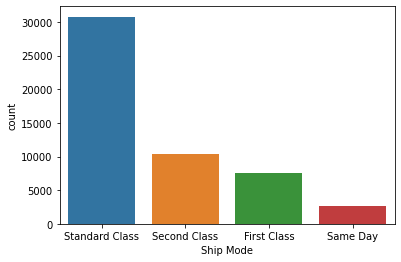

In [35]:
sns.countplot('Ship Mode', data=data)

### Maximum Sales and Profit Per Market

In [36]:
data.groupby('Market')['Sales', 'Profit'].max().sort_values(['Sales', 'Profit'], ascending = False)

,Sales,Profit
Market,,
US,22638.48,8399.976
EU,7958.58,3979.080
APAC,6998.64,2939.310
Africa,5301.24,2597.280
EMEA,5211.12,1622.880
Canada,3863.88,1159.020
LATAM,3474.08,1313.280


### Minimum Sales and Profit Per Market

In [82]:
data.groupby('Market')['Sales', 'Profit'].min().sort_values(['Sales', 'Profit'], ascending = False)

,Sales,Profit
Market,,
Canada,3.990,0.000
EU,2.955,-3059.820
APAC,2.880,-3009.435
LATAM,1.566,-1806.240
EMEA,1.440,-4088.376
Africa,1.161,-1576.824
US,0.444,-6599.978


#### The product Category that Brings the Most Sales

In [38]:
category_most_sales = data.pivot_table(values = 'Sales', index = 'Product Name', columns = 'Category')
category_most_sales.max().sort_values(ascending = False) 

Category
Technology         22638.480000
Office Supplies     5676.770667
Furniture           4021.044000
dtype: float64

The product Category that Brings the Most Profit

In [39]:
category_most_profit = data.pivot_table(values = 'Profit', index = 'Product Name', columns = 'Category')
category_most_profit.max().sort_values(ascending = False) 

Category
Technology         5039.985600
Office Supplies    1115.094100
Furniture           500.821077
dtype: float64

#### Dorminant Product Category Per Market

In [40]:
dominant_prod_cat = data.pivot_table(values = 'Sales', index = 'Market', columns = 'Category')

dominant_prod_cat.sort_values('Market', ascending = False)

Category,Furniture,Office Supplies,Technology
Market,,,
US,349.834887,119.324101,452.709276
LATAM,340.877674,96.199374,384.738446
EU,519.055996,158.796027,582.554444
EMEA,296.910047,83.920531,312.738652
Canada,252.268571,108.426282,404.597077
Africa,308.479612,87.604444,353.860640
APAC,553.286978,143.163321,566.565203


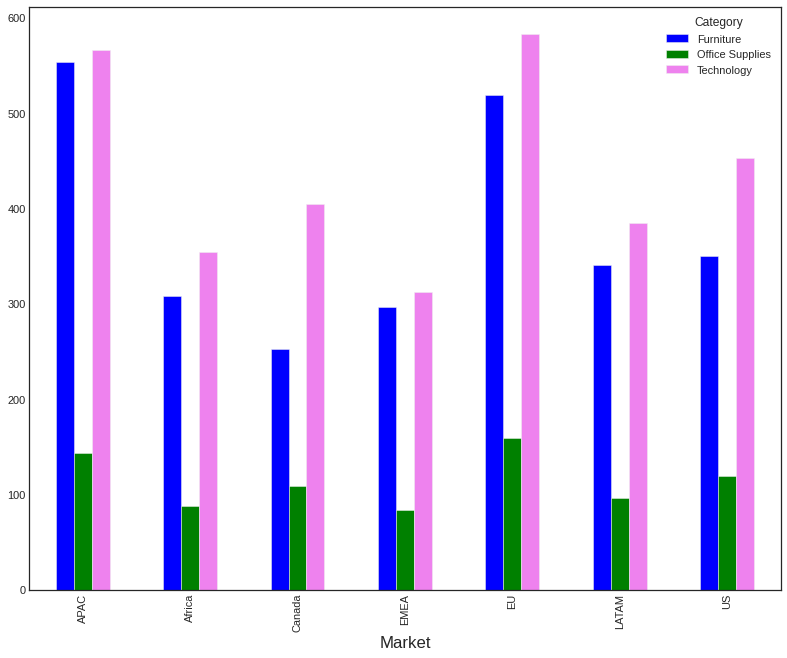

In [83]:
style.use('seaborn-white')
dominant_prod_cat.plot.bar(color={"Furniture": "Blue", "Office Supplies": "green", "Technology": "Violet"}, figsize = (12,10))

In [42]:
#City with most orders for a given product category
city_with_most_orders = data.groupby(['City', 'Category'])['Order ID'].count().sort_values(ascending = False)
city_with_most_orders.head(10)

City           Category       
New York City  Office Supplies    552
Los Angeles    Office Supplies    443
San Francisco  Office Supplies    322
Philadelphia   Office Supplies    312
Santo Domingo  Office Supplies    250
Seattle        Office Supplies    249
Houston        Office Supplies    231
Manila         Office Supplies    227
Lagos          Office Supplies    213
Tegucigalpa    Office Supplies    207
Name: Order ID, dtype: int64

### Descriptive Statistics by Date

In [43]:
more_sales_year = data.groupby('Year')['Sales'].max().sort_values(ascending = False)
more_sales_year       #year the company records more sales

Year
2011    22638.48
2013    17499.95
2014    13999.96
2012     6354.95
Name: Sales, dtype: float64

In [44]:
more_sales_month = data.groupby('Month')['Sales'].max().sort_values(ascending = False)
more_sales_month       #month the company records more sales

Month
March        22638.480
October      11199.968
November     10499.970
December      9892.740
September     9449.950
April         9099.930
February      8749.950
May           8399.976
July          8187.650
August        8159.952
June          5486.670
January       5451.300
Name: Sales, dtype: float64

In [45]:
more_sales_month_year = data.groupby(['Year', 'Month'])['Sales'].max().sort_values(ascending = False)
more_sales_month_year       #month and year the company records more sales

Year  Month    
2011  March        22638.4800
2013  March        17499.9500
2014  March        13999.9600
      October      11199.9680
      November     10499.9700
2013  December      9892.7400
2011  September     9449.9500
2013  April         9099.9300
      February      8749.9500
      May           8399.9760
2011  July          8187.6500
      August        8159.9520
2014  May           7999.9800
      August        7958.5800
2011  December      6999.9600
      October       6998.6400
2012  March         6354.9500
      December      5785.0200
      February      5759.9640
      August        5737.5000
2011  November      5725.3500
2012  May           5724.5400
2014  September     5667.8700
      June          5486.6700
2013  January       5451.3000
2014  January       5443.9600
2012  April         5244.8400
2013  July          5211.1200
      October       5175.1710
2014  December      4864.3200
      February      4799.9840
2013  November      4618.2150
2011  February      4544

In [46]:
more_sales_month_year = pd.DataFrame(more_sales_month_year)

In [47]:
more_profit_month_year = data.groupby(['Month', 'Year'])['Profit'].max().sort_values(ascending = False)
more_profit_month_year #more profit per month and year

Month      Year
March      2013    8399.9760
           2014    6719.9808
November   2014    5039.9856
December   2013    4946.3700
September  2011    4630.4755
August     2014    3979.0800
October    2014    3919.9888
March      2012    3177.4750
October    2011    2939.3100
February   2013    2799.9840
May        2013    2591.9568
January    2014    2504.2216
August     2011    2476.4400
May        2012    2461.3200
April      2013    2365.9818
June       2014    2316.5100
December   2012    2302.9671
           2011    2239.9872
August     2012    2229.0240
September  2014    2097.0300
January    2013    2071.4400
April      2011    1995.9900
August     2013    1989.5400
January    2012    1989.5400
April      2012    1906.4850
February   2011    1868.1300
October    2013    1644.2913
July       2011    1644.0300
June       2011    1622.8800
November   2011    1602.9900
April      2014    1563.4800
May        2011    1517.7120
November   2013    1470.2100
July       2013    1465.200

In [78]:
more_profit_month_year = pd.DataFrame(more_profit_month_year)

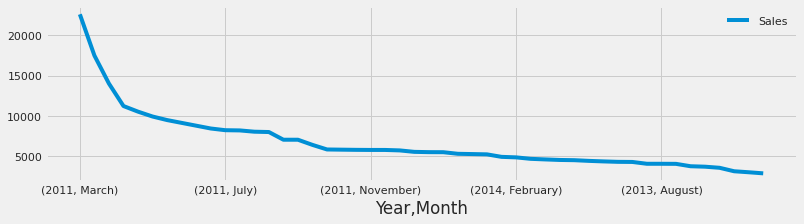

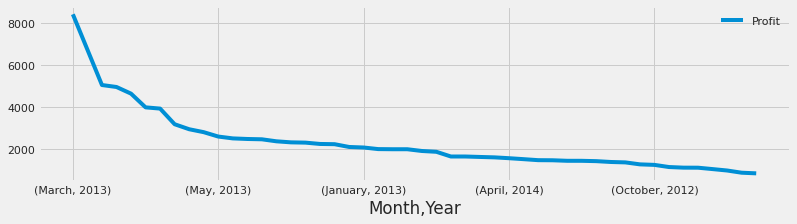

In [79]:
style.use('fivethirtyeight')
more_sales_month_year.plot.line(figsize=(12,3))
more_profit_month_year.plot.line(figsize=(12,3))

The highest sales and profit were recorded in March 2011 and March 2013 respectively for the four year period.  

In [49]:
data[['Year', 'Sales']].groupby('Year').describe()

Sales                                                           \
        count        mean         std    min     25%     50%       75%   
Year                                                                     
2011   8998.0  251.105901  536.893640  0.852  30.405  84.266  253.8630   
2012  10962.0  244.247281  450.299914  0.984  31.620  87.138  250.0125   
2013  13799.0  246.811106  494.719419  0.836  30.816  85.232  249.7200   
2014  17531.0  245.272139  477.630355  0.444  30.354  84.480  251.1300   

                
           max  
Year            
2011  22638.48  
2012   6354.95  
2013  17499.95  
2014  13999.96

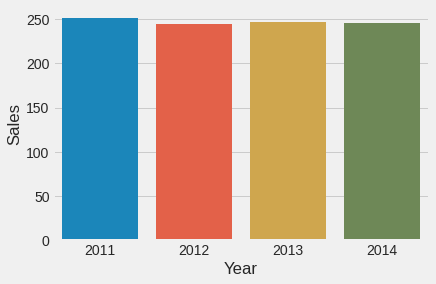

In [50]:
sns.barplot(x=data['Year'], y=data['Sales'], ci = None)

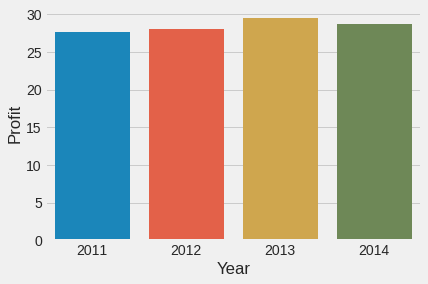

In [51]:
sns.barplot(x=data['Year'], y=data['Profit'], ci = None)

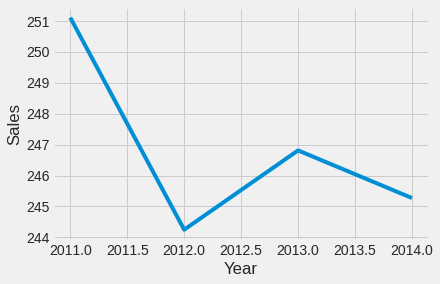

In [54]:
sns.lineplot(x= data.groupby(data.Year).mean().index, 
             y = data.groupby(data.Year).mean()['Sales'])

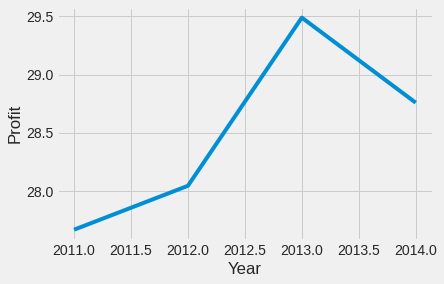

In [55]:
sns.lineplot(x= data.groupby(data.Year).mean().index, 
             y = data.groupby(data.Year).mean()['Profit'])

In [56]:
data['Year'].value_counts()

2014    17531
2013    13799
2012    10962
2011     8998
Name: Year, dtype: int64

In [57]:
years = [2011, 2012, 2013, 2014]
colors = ['blue', 'green', 'red', 'orange']


##### Sales by Months

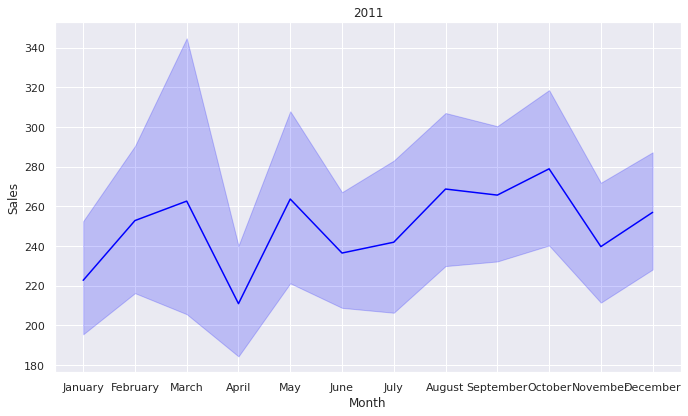

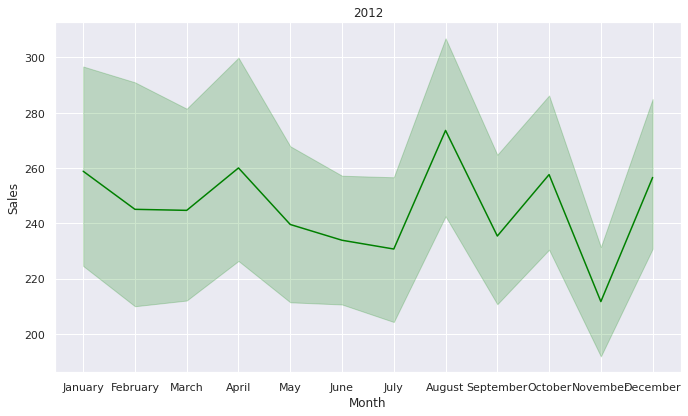

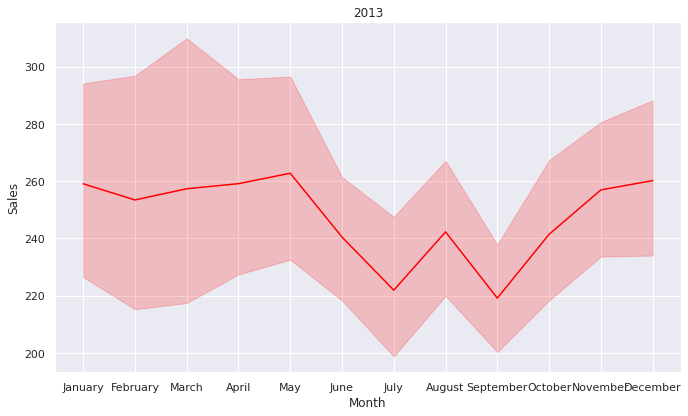

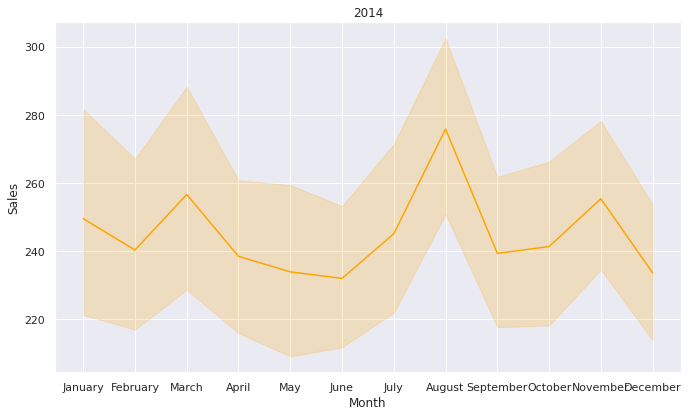

In [58]:
for i in range(len(years)):
  sns.set( rc={"figure.figsize":(10,6)} )
  sns.lineplot(data = data[data['Year'] == years[i]], y ='Sales', x='Month', color=colors[i])
  plt.title(years[i])
  plt.show()

##### Profits by Month

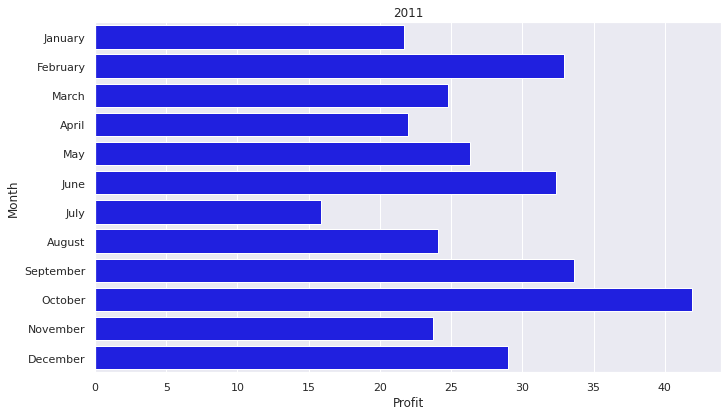

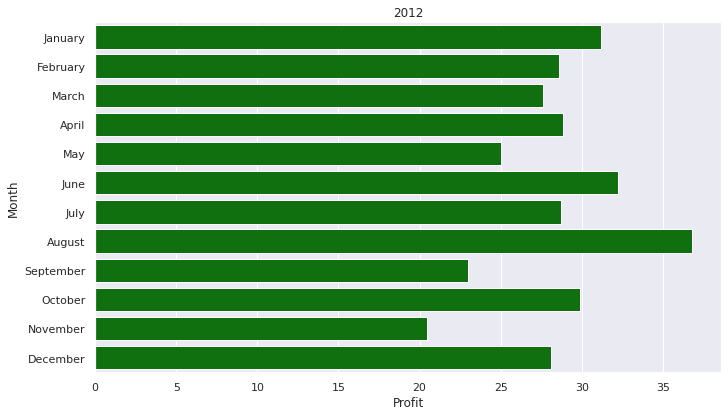

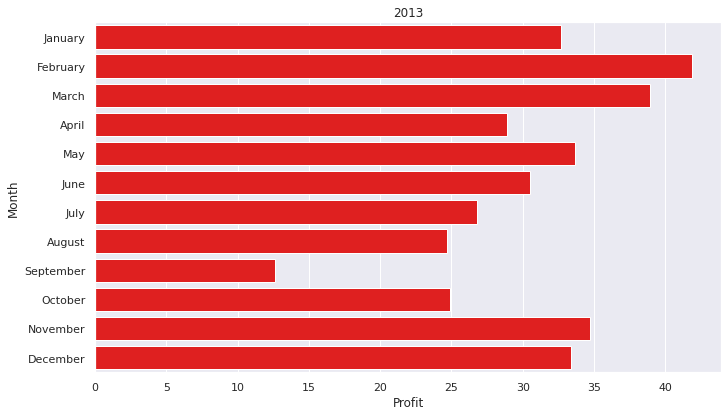

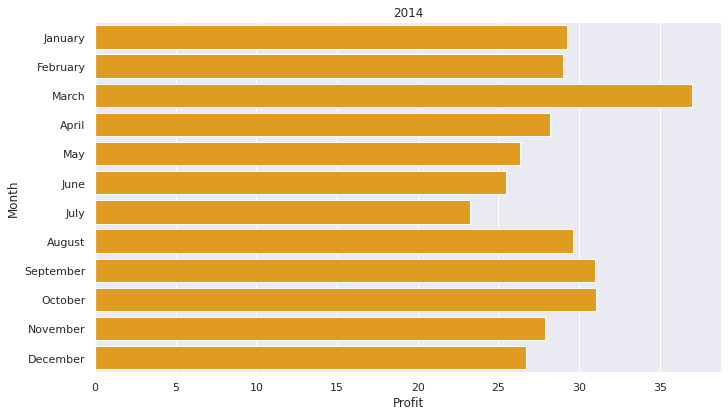

In [59]:
for i in range(len(years)):
  sns.barplot(data = data[data['Year'] == years[i]], y ='Month', x='Profit', color=colors[i], ci=None)
  plt.title(years[i])
  plt.show()

In [60]:
data['Order Delay'].value_counts()

4 days       7166
5 days       5459
2 days       4007
6 days       2836
3 days       2635
             ... 
-29 days        5
-21 days        3
-147 days       3
-50 days        2
-294 days       2
Name: Order Delay, Length: 152, dtype: int64

### Visualizations

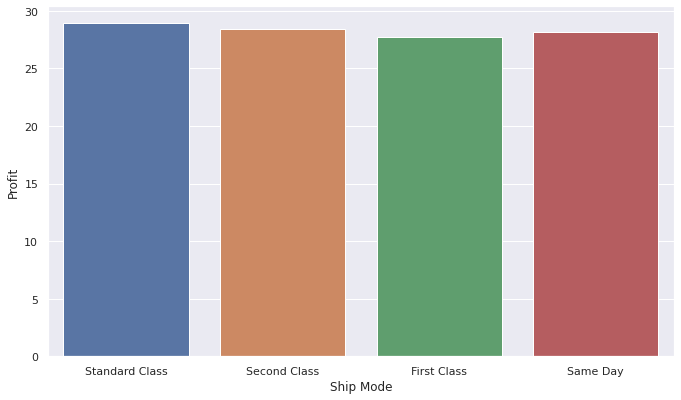

In [63]:
sns.barplot(x='Ship Mode', y='Profit', data=data, ci = None)

### Products Making Losses

In [64]:
prod_making_loss = data.groupby('Category')['Profit'].min().sort_values(ascending = False)
prod_making_loss

Category
Furniture         -2750.2800
Office Supplies   -3701.8928
Technology        -6599.9780
Name: Profit, dtype: float64

Overall, technology seems to be making more profit and causing more losses at the same time, hence there is the need to strategise in order to make more sales and profit from this category. 

### Segment Making More Profit


In [65]:
segment_making_more_profit = data.groupby('Segment')['Profit'].max().sort_values(ascending = False)
segment_making_more_profit

Segment
Corporate      8399.9760
Consumer       6719.9808
Home Office    3919.9888
Name: Profit, dtype: float64

Overall, the segment making more profit from the output above is corporate, followed by consumer and then home office. 

### Order Priority Yielding More Sales

In [66]:
order_priority_more_sales = data.groupby('Order Priority')['Sales'].max().sort_values(ascending = False)
order_priority_more_sales

Order Priority
Medium      22638.480
High        11199.968
Critical     8749.950
Low          7958.580
Name: Sales, dtype: float64

In [67]:
order_priority_more_sales.index

Index(['Medium', 'High', 'Critical', 'Low'], dtype='object', name='Order Priority')

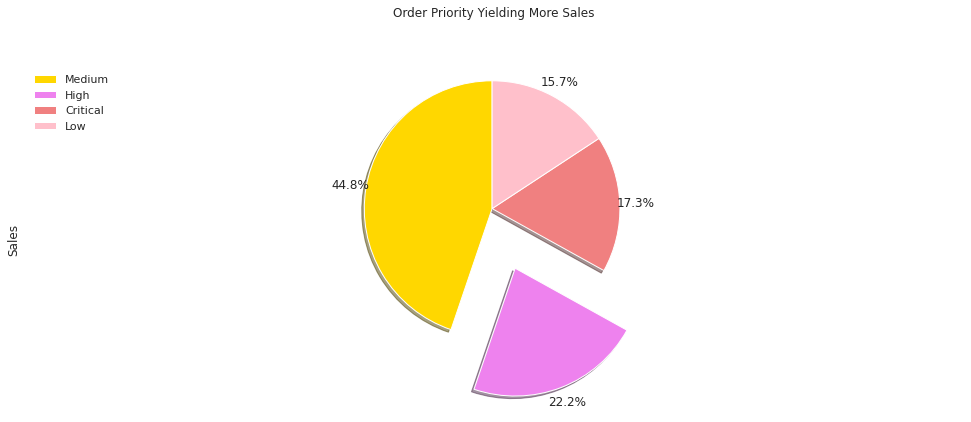

In [68]:
colors_list=['gold','violet','lightcoral','pink']
explode_list= [0,0.5,0,0]
order_priority_more_sales.plot(kind='pie',
                            figsize=(15,6),
                            autopct='%1.1f%%',
                            startangle = 90,
                            shadow=True,
                            labels=None,
                            pctdistance=1.12,
                            colors=colors_list,
                            explode=explode_list) 
plt.title('Order Priority Yielding More Sales',y=1.12)
plt.axis('equal')
plt.legend(labels=order_priority_more_sales.index, loc='upper left')
plt.show()

From the pie plot above, the order priority yielding more sales is Medium. The other priority types are also performing averagely well. 

### Average Shipping Cost to Each Region


In [69]:
avg_shipping_cost = data.groupby('Region')['Shipping Cost'].mean().sort_values(ascending = False)
avg_shipping_cost

Region
North Asia        40.646112
Central Asia      38.003003
Oceania           34.593780
Southeast Asia    29.937948
North             27.476299
Central           26.710494
East              25.542001
South             25.353509
West              23.887687
Caribbean         21.059260
Canada            19.285495
Africa            19.215058
EMEA              17.573221
Name: Shipping Cost, dtype: float64

In [70]:
# What product categories should be targetted to the  different markets?
prod_cat_mkt = data.groupby(['Category', 'Market'])['Sales'].max().sort_values(ascending = False)
prod_cat_mkt

Category         Market
Technology       US        22638.480
Office Supplies  US         9892.740
                 EU         7958.580
Technology       APAC       6998.640
                 EU         5785.020
Furniture        APAC       5759.964
                 EU         5729.346
Technology       Africa     5301.240
                 EMEA       5211.120
Office Supplies  APAC       4864.320
Furniture        EMEA       4486.860
                 US         4416.174
Office Supplies  EMEA       3955.140
Furniture        Africa     3877.680
Technology       Canada     3863.880
                 LATAM      3474.080
Furniture        LATAM      3473.140
Office Supplies  Africa     3409.740
                 LATAM      3242.880
                 Canada     1799.100
Furniture        Canada     1758.000
Name: Sales, dtype: float64

### Conclusion



* The US market seems to be leading in both sales and profit. The dorminant product in this market is Technology. Hence, Superstore can target more technological items to this market in order to increase sales.

* The Canada market is very profitable but sales from there is not encouraging. The dorminant products in this market are technology and furniture. Hence, there is the need to develop sales strategies that can attract the Canada market to purchase more.

* In terms of the EU market, sales for both technology and furniture are high. Hence, there is the need to concentrate on promoting sale of office supplies to this market in order to increase sales. 


* With regards to the rest of the markets, there is the need to develop sales strategies that can help promote sales of all the product categories in these markets. 








### Group Members:
1. Ahlam Mustapha
2. Theophilus Dortumor
3. Andrew Kojo Mensah-Onumah
4. Henrietta Kadi Tettey-Tawiah
5. Frank Erzoah-Cudjoe

END🦋